# Seaborn

## 📊 Seaborn Plot Categories

Here’s a summary of the main plot types in Seaborn, organized by purpose:

| **Category**       | **Purpose**                            | **Common Functions**                                 |
|--------------------|----------------------------------------|------------------------------------------------------|
| **Relational**      | Relationships between variables         | `scatterplot`, `lineplot`, `relplot`                 |
| **Categorical**     | Compare across categories               | `catplot`, `boxplot`, `barplot`, `countplot`, `violinplot`, `swarmplot`, `stripplot`, `pointplot` |
| **Distribution**    | Shape/spread of data                   | `histplot`, `kdeplot`, `displot`, `ecdfplot`         |
| **Regression**      | Fit models, show trends                | `regplot`, `lmplot`                                  |
| **Matrix**          | Grid-style patterns/correlations       | `heatmap`, `clustermap`                              |
| **Multivariate**    | Multiple variables simultaneously      | `pairplot`, `jointplot`                              |

---

### 🔍 Notes:
- **Relational plots** use numeric variables and can add `hue`, `style`, and `size` for more dimensions.
- **Categorical plots** are best when you have a mix of numeric and categorical data.
- **Distribution plots** help you understand the data’s shape, skew, and spread.
- **Regression plots** combine scatterplots with a trend/regression line.
- **Matrix plots** are ideal for visualizing correlations or grouped data.
- **Multivariate plots** like `pairplot` and `jointplot` are useful for EDA (exploratory data analysis).



# Relational/ Statistical plots
- Relational plots are used to visualize relationships between two or more variables. They are particularly useful for multivariate data analysis, helping identify patterns, trends, and correlations.
- Common Types of Relational Plots:
    -  ***Scatter Plot***:-
        - Shows the relationship between two numeric variables.
        - Useful for identifying correlation, clusters, and outliers.
        - Can be enhanced with additional variables using color (hue), size, or style.
        - ***Example***:- sns.scatterplot(data=df, x="age", y="income", hue="gender")

    -  ***Line Plot***:-
        - Ideal for showing trends over a continuous variable, often time.
        - Can display multiple lines using hue to represent different groups.
        - ***Example***:- sns.lineplot(data=df, x="year", y="sales", hue="region")
     -  ***FacetGrid***:-
        - A powerful way to visualize multi-dimensional relationships.
        - Splits data across rows and/or columns for subplots using categorical variables.
        - ***Example***:- g = sns.FacetGrid(df, col="gender", row="region")
                      g.map(sns.scatterplot, "age", "income")

In [2]:
# plotting a scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
plt.style.use("fivethirtyeight")

In [14]:
data = sns.load_dataset("tips")

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
data.shape

(244, 7)

In [17]:
data["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

## Plot a scatter Plot between total_bill and tip

There are 2 ways to plot a scatter plot either by snd.relplot or by sns.scatterplot

### Using sns.relplot

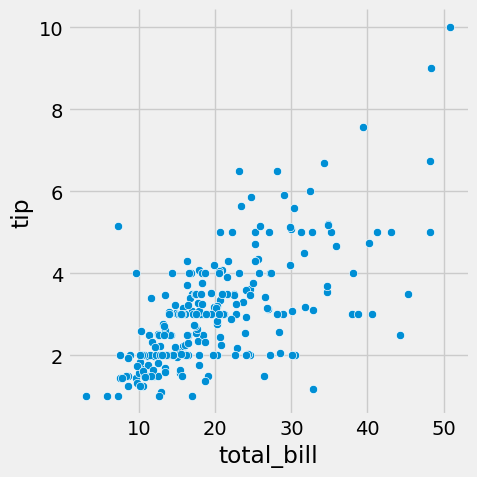

In [18]:
sns.relplot(x = "total_bill", y = "tip" ,kind = "scatter", data = data)
#  kind is a hidden parameter means you can skip it here but you will notice that
# in line plot you will mention kind = line

### The hue parameter

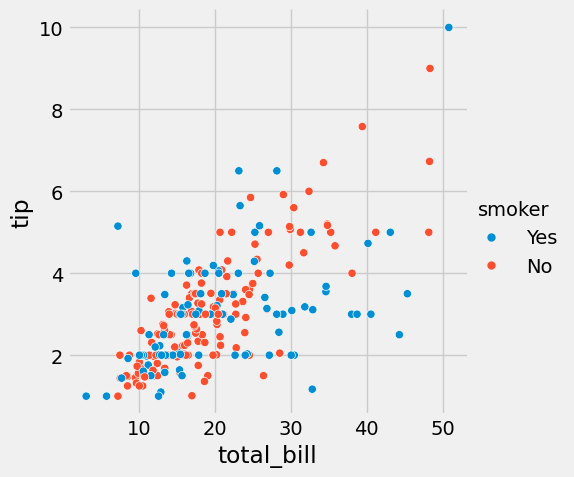

In [19]:
sns.relplot(x = "total_bill" , y = "tip" ,hue = "smoker", data = data )
# Hue is used to add a third variable by color-coding data points to help 
# distinguish different groups or categories within the data.

### The style parameter

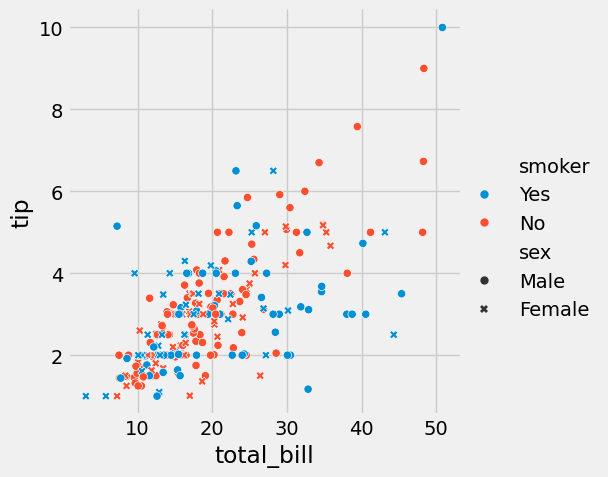

In [20]:
sns.relplot(x = "total_bill" , y = "tip" ,hue = "smoker",style = "sex", data = data )
# The style parameter is used to differentiate categories using marker shapes (like circles, triangles, etc.).
# Like hue, it adds a third variable — but instead of color, it uses visual style (marker type or line style).


### The size parameter

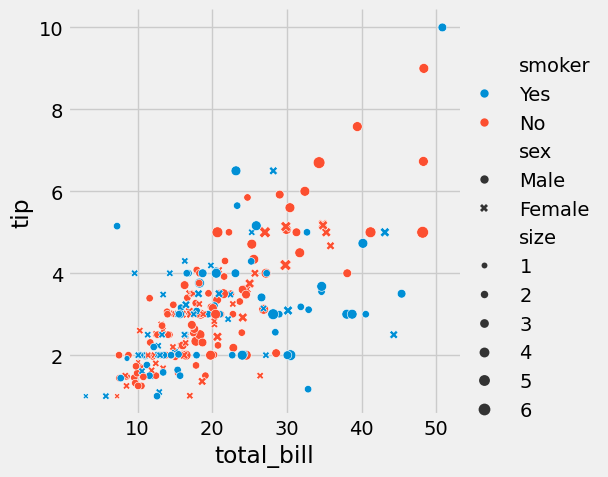

In [21]:
sns.relplot(x = "total_bill" , y = "tip" ,hue = "smoker",style = "sex",size = "size" , data = data)
# The size parameter is used to represent a numeric or categorical variable by changing the size of the markers.

### Using the scatterplot function

<Axes: xlabel='total_bill', ylabel='tip'>

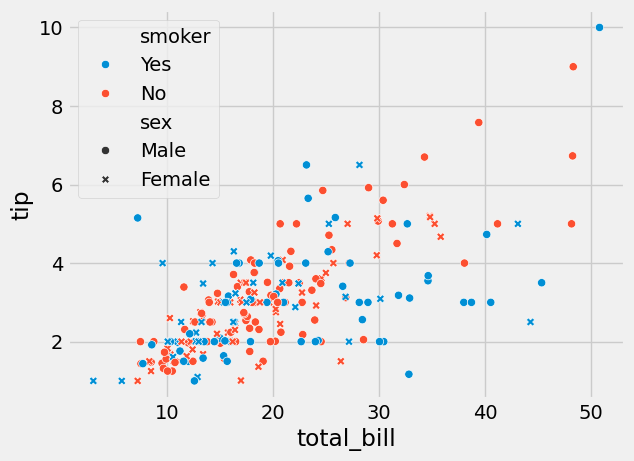

In [22]:
sns.scatterplot(x = "total_bill" , y = "tip" ,hue = "smoker",style = "sex", data = data )

### Plotting a line plot between total_bill and tip

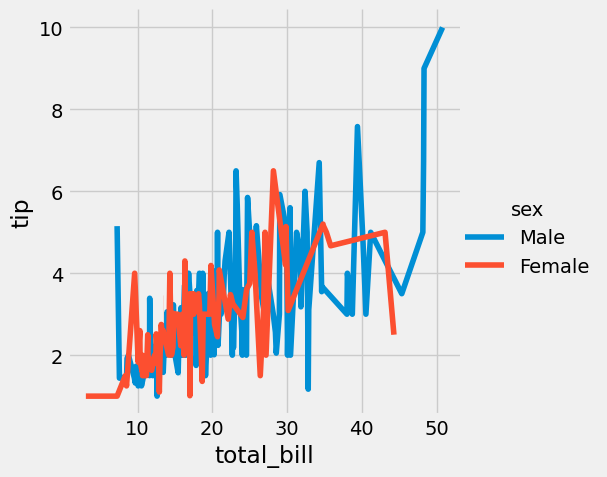

In [23]:
# method 1 
sns.relplot(x = "total_bill" , y = "tip" , data = data , kind = "line" , hue = "sex")

<Axes: xlabel='total_bill', ylabel='tip'>

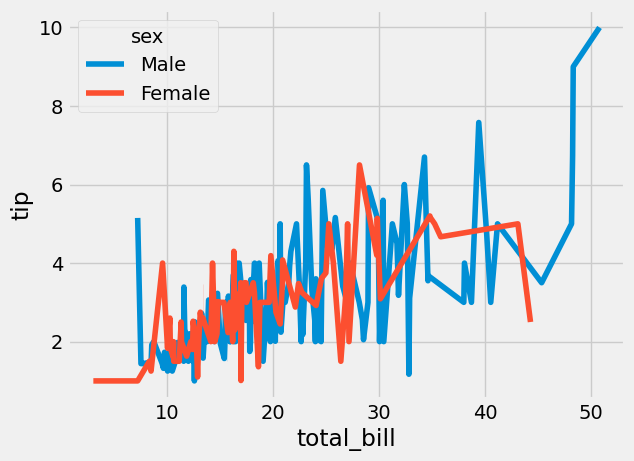

In [24]:
# method 2 
sns.lineplot(x = "total_bill" , y = "tip" , data = data ,  hue = "sex")

# Categorical Plots 

- Used when **at least one variable is categorical** (e.g., gender, day, region).
- Ideal for **comparing values between categories** — like distributions, counts, and estimates.

---

### 🔹 `catplot` – *Figure-Level Function*
- catplot is a single function that can create many different types of categorical plots just by changing the kind parameter.
- Can use `kind=` to switch between:
    - `"strip"` → Strip plot
    - `"swarm"` → Swarm plot
    - `"box"` → Box plot
    - `"violin"` → Violin plot
    - `"bar"` → Bar plot (shows estimate )
    - `"point"` → Point plot (also shows estimate )
    - `"count"` → Count plot (shows frequency)

---

### Categories of Categorical Plots

| **Category**                    | **Plots**                                           | **Purpose**                                  |
|--------------------------------|-----------------------------------------------------|-----------------------------------------------|
| **Categorical Scatterplots**   | `stripplot`, `swarmplot`                           | Show all data points by category              |
| **Categorical Distribution**   | `boxplot`, `violinplot`                            | Show distribution and spread by category      |
| **Categorical Estimate Plots** | `barplot`, `pointplot`, `countplot`                | Show aggregate estimates (mean, count, etc.)  |
| **Categorical-Categorical**    | `heatmap`, `clustermap` (from `sns.heatmap`)       | Show frequency or correlation of 2 categories |

---

### Plotting Side-by-Side
- `catplot` supports **FacetGrid** options like:
    - `col=`, `row=` → to split into subplots
    - `hue=` → to add color dimension

---

### Example:
```python
sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    kind="box",     # Change to "swarm", "violin", etc.
    hue="sex",
    col="smoker"
)


In [25]:
# x- axis  ----> categorical data
# y- axis  ----> numerical data

In [19]:
plt.style.use("fivethirtyeight")

In [20]:
tips = sns.load_dataset("tips")

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Stripplot

* There are 2 methods to plot these graph either 
- sns.catplot(---,kind = "plot type",---)  (or)
- sns.plot type(---) (exa:- snd.stripplot or sns.swarmplot)

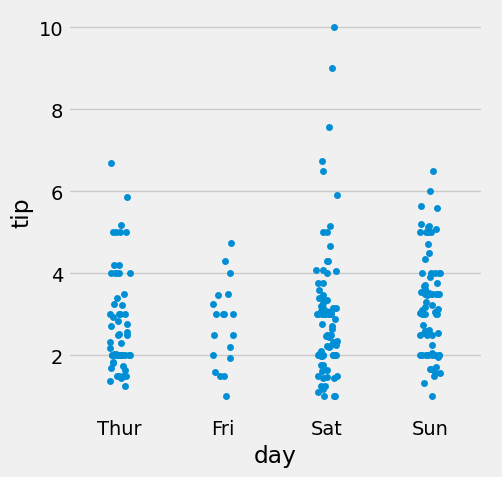

In [30]:
sns.catplot(x = "day" , y="tip" , kind="strip" , data = tips)

### Swarmplot

C:\Users\Toshaksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Toshaksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


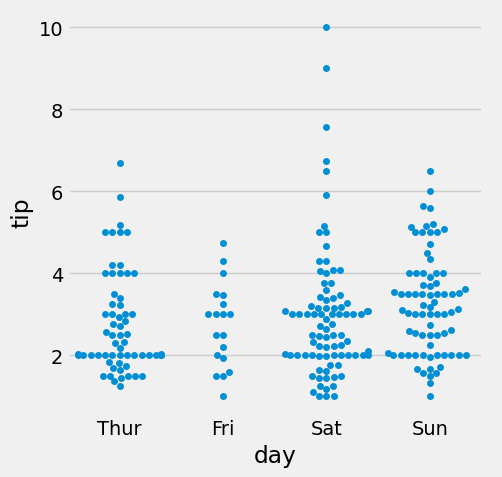

In [31]:
sns.catplot(x = "day" , y ="tip", kind = "swarm" , data = tips)

have the hue parameter but not style and size parameter

C:\Users\Toshaksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Toshaksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


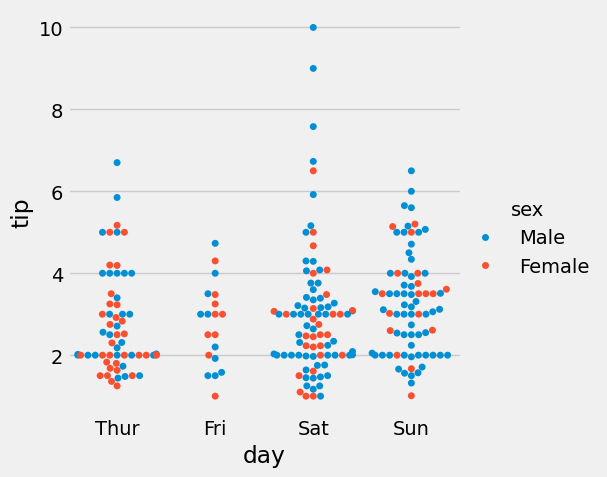

In [32]:
sns.catplot(x = "day" , y ="tip", kind = "swarm" ,hue = "sex", data = tips)

### Boxplot

A boxplot is a standardized way of displaying the distribution of a data set based on its five-number summary of data points: 
- the “minimum,” 
- first quartile [Q1],
- median, 
- third quartile [Q3] 
- “maximum.”
  
  ![My Image](https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot-660x233.png)



<Axes: ylabel='tip'>

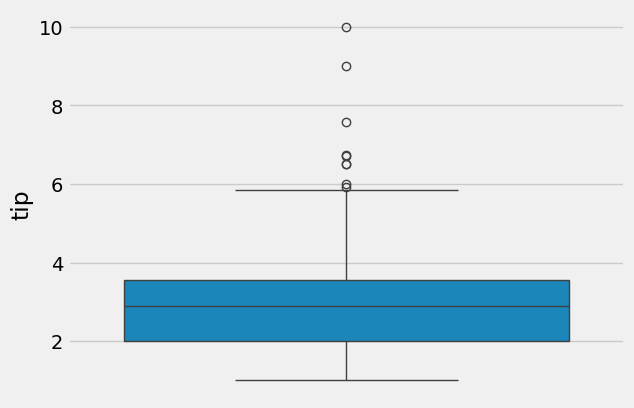

In [35]:
# method 1 (univarient)
sns.boxplot(tips["tip"])

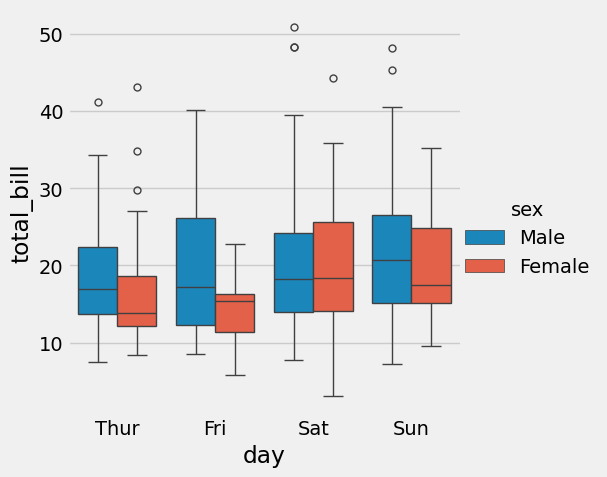

In [37]:
# method 2 (multivarient)
sns.catplot(x= "day" , y = "total_bill", hue = "sex" , kind = "box", data= tips)

### Voilin Plot

* A violin plot combines aspects of a boxplot and a KDE (Kernel Density Estimate) plot to show the distribution, probability density, and summary statistics of a dataset.
* It displays the full distribution of the data.
* The width of the violin shows the density of the data at different values.
* Includes the median, quartiles, and possibly individual observations.
* Useful for comparing multiple distributions side-by-side.
![My Image](https://media.geeksforgeeks.org/wp-content/uploads/20230525164731/viloin-plot.png)

<Axes: ylabel='total_bill'>

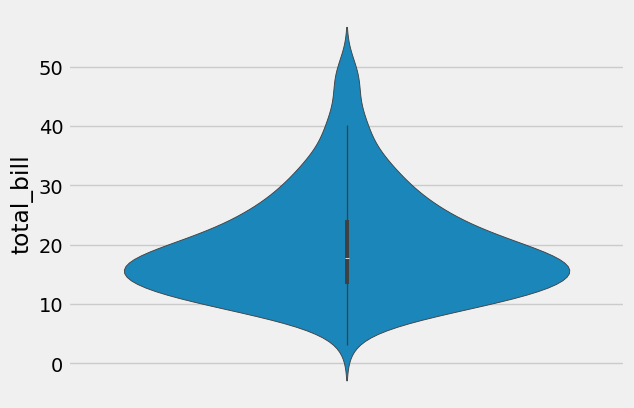

In [22]:
sns.violinplot(tips["total_bill"])   #univarient

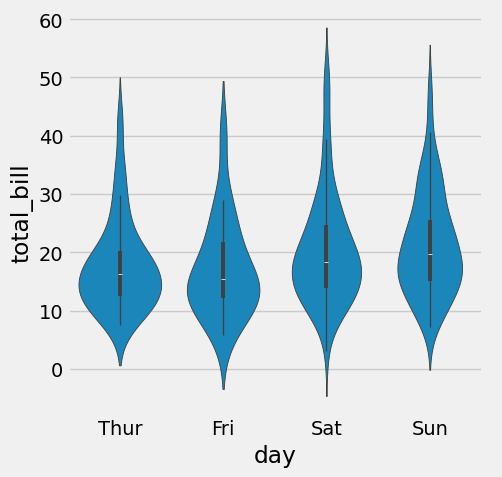

In [23]:
sns.catplot(x = "day" , y = "total_bill", kind = "violin" , data = tips)  #multivarient

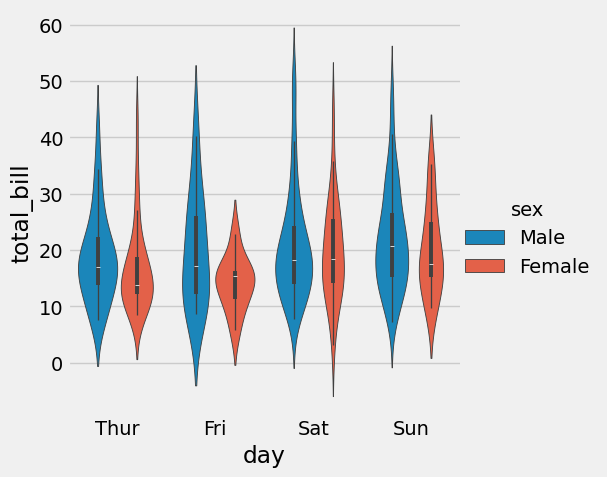

In [8]:
sns.catplot(x = "day" , y = "total_bill", kind = "violin" ,hue = "sex" , data = tips)

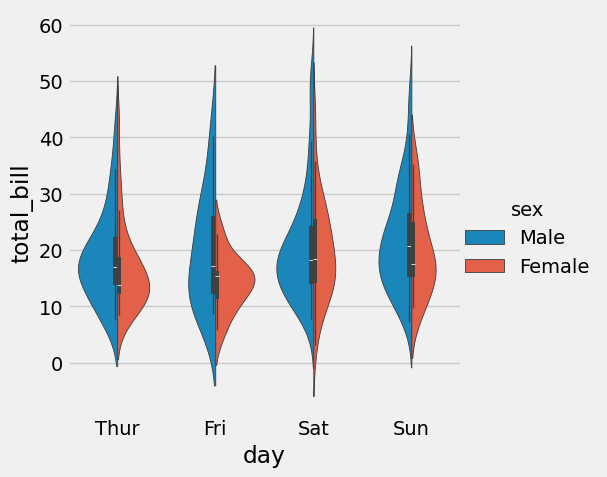

In [24]:
sns.catplot(x = "day" , y = "total_bill", kind = "violin" ,hue = "sex" ,split = True, data = tips)   #showing hue side by side

### Barplot and countplot

#### Bar Plot
- A bar plot displays the average value of a numerical variable for each category.
- Shows central tendency (usually mean) with optional error bars (like standard deviation).
- Useful for comparing group-wise aggregate values.
- Requires one categorical and one numerical variable.

#### Count Plot
- A count plot is a specialized bar plot that shows the count (frequency) of observations in each category.
- It’s essentially a bar plot for categorical variables only.
- Does not require a numerical y-variable.
- Automatically counts occurrences.

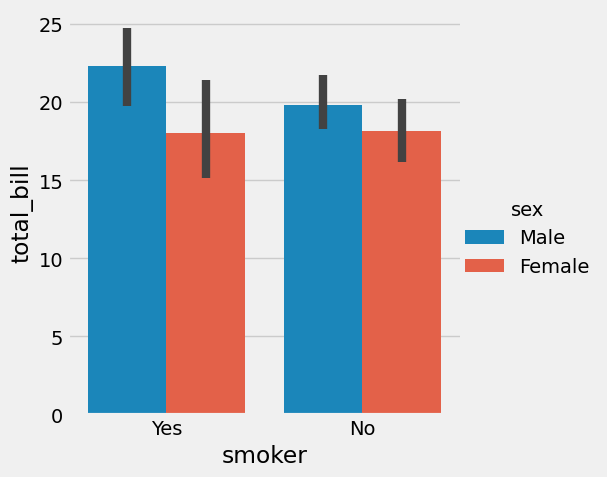

In [13]:
sns.catplot(x = "smoker" , y = "total_bill", kind = "bar",hue = "sex", data = tips)

- The black lines on top of each bar are called error bars.
- They show how much the average value might vary.
- By default, they represent a 95% confidence range — meaning we're 95% sure the true average is somewhere in that range.
- Shorter black lines = more consistent data
- Longer black lines = more variation in the data

In [26]:
# default action in barplot is to find the mean but can alter this using the estimator parameter 

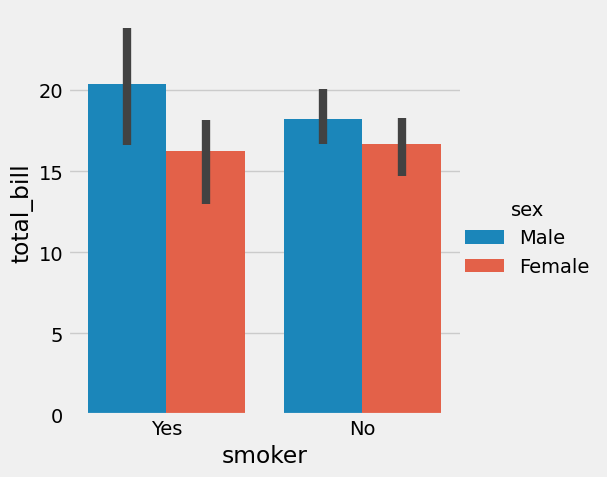

In [15]:
sns.catplot(x = "smoker" , y = "total_bill", kind = "bar",hue = "sex",estimator = np.median, data = tips)

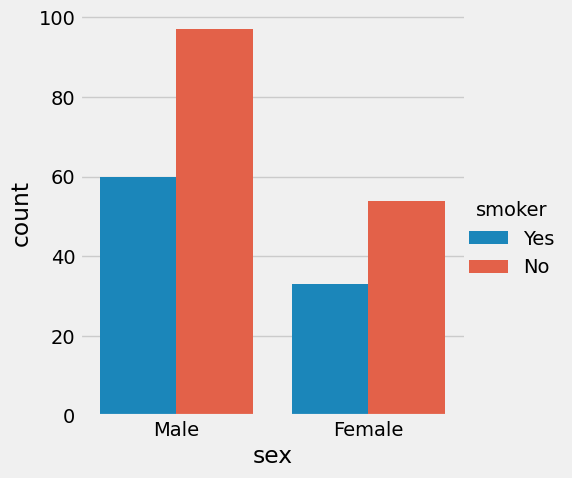

In [19]:
sns.catplot(x = "sex", kind = "count",hue = "smoker", data = tips)

# Matrix Plots

### Heatmap
---

- A heatmap is a visual way to show data in a matrix (table) form where values are represented by color intensity.
- Darker or brighter colors mean higher or lower values
- Often used for:
  - Showing correlations between variables
  - Displaying pivot tables or confusion matrices
  - Makes it easy to spot patterns, outliers, and relationships

In [28]:
flights = sns.load_dataset("flights")

In [29]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [30]:
# It creates a pivot table from the flights DataFrame where:
# - index="year"	Rows will be years
# - columns="month"	Columns will be months
# - values="passengers"	The values in the table will be passenger counts
# - aggfunc=sum	If there are duplicates, sum them (though in this dataset, usually there’s only one value per year/month)

In [31]:
x = flights.pivot_table(index="year", columns = "month", values= "passengers",aggfunc = sum)

C:\Users\Toshaksha\AppData\Local\Temp\ipykernel_29360\484444298.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  x = flights.pivot_table(index="year", columns = "month", values= "passengers",aggfunc = sum)
C:\Users\Toshaksha\AppData\Local\Temp\ipykernel_29360\484444298.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  x = flights.pivot_table(index="year", columns = "month", values= "passengers",aggfunc = sum)


<Axes: xlabel='month', ylabel='year'>

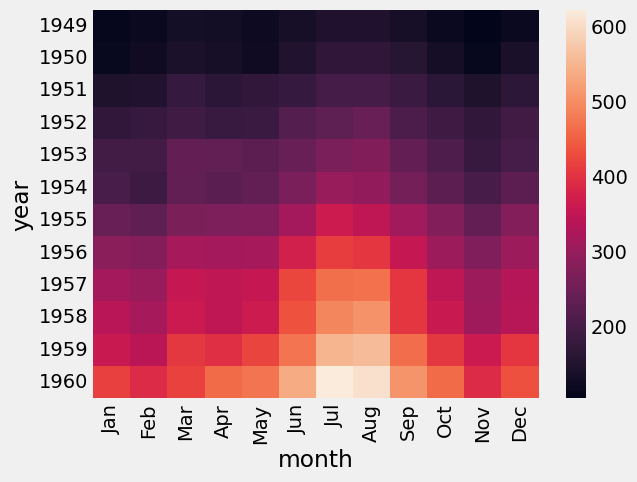

In [32]:
sns.heatmap(x)

<Axes: xlabel='month', ylabel='year'>

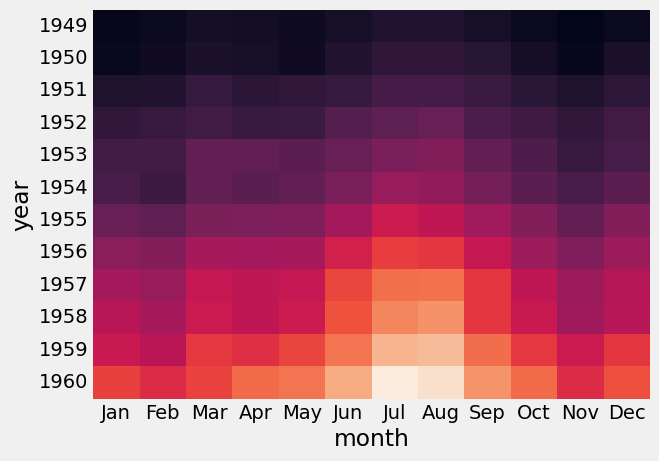

In [33]:
sns.heatmap(x,cbar = False)        # to remove the color bar at the side

<Axes: xlabel='month', ylabel='year'>

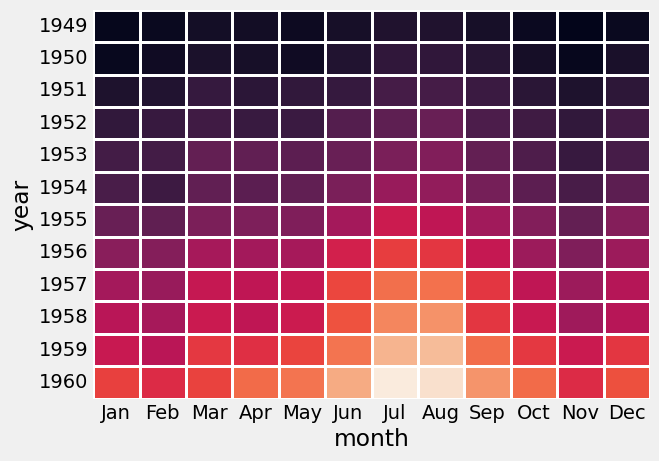

In [32]:
sns.heatmap(x,cbar = False, linewidths = 1)

<Axes: xlabel='month', ylabel='year'>

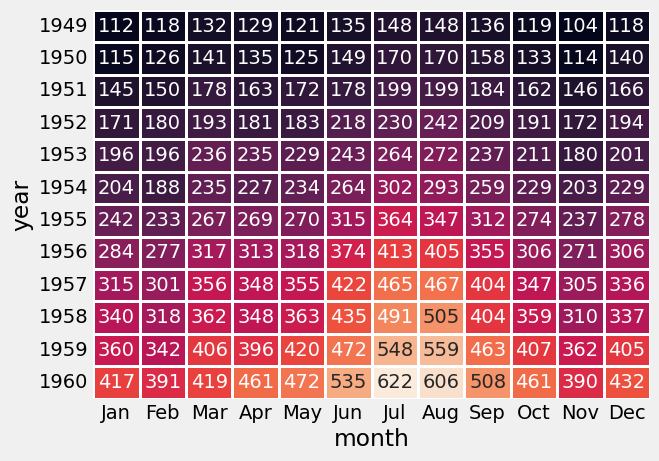

In [34]:
sns.heatmap(x,cbar = False, linewidths = 1, annot = True , fmt = "d")      #annot = annotations means the value and fmt is format which is set to integer 'd'

In [35]:
# experimenting with color map (cmap ) to give diffrent tones to our heatmap

<Axes: xlabel='month', ylabel='year'>

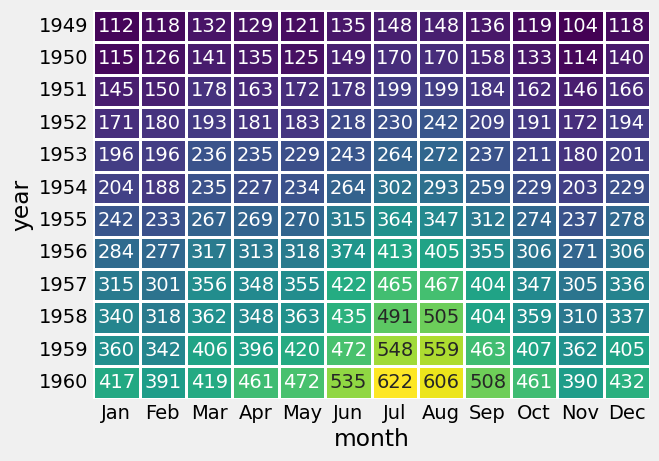

In [37]:
sns.heatmap(x,cbar = False, linewidths = 1, annot = True , fmt = "d", cmap ="viridis")

### Clustermap

A clustermap is a special type of heatmap that also clusters similar rows and columns together using hierarchical clustering.

* What It Does:
    - Displays data in a grid format like a heatmap
    - Automatically reorders rows and columns to group similar values
    - Adds dendrograms (tree-like structures) on the sides to show how data is clustered
    - Helps you discover patterns or groupings in the data

* Use When:
    - You want to find similarities or natural groupings in your data
    - Great for analyzing correlation matrices, gene expression data, or customer behavior

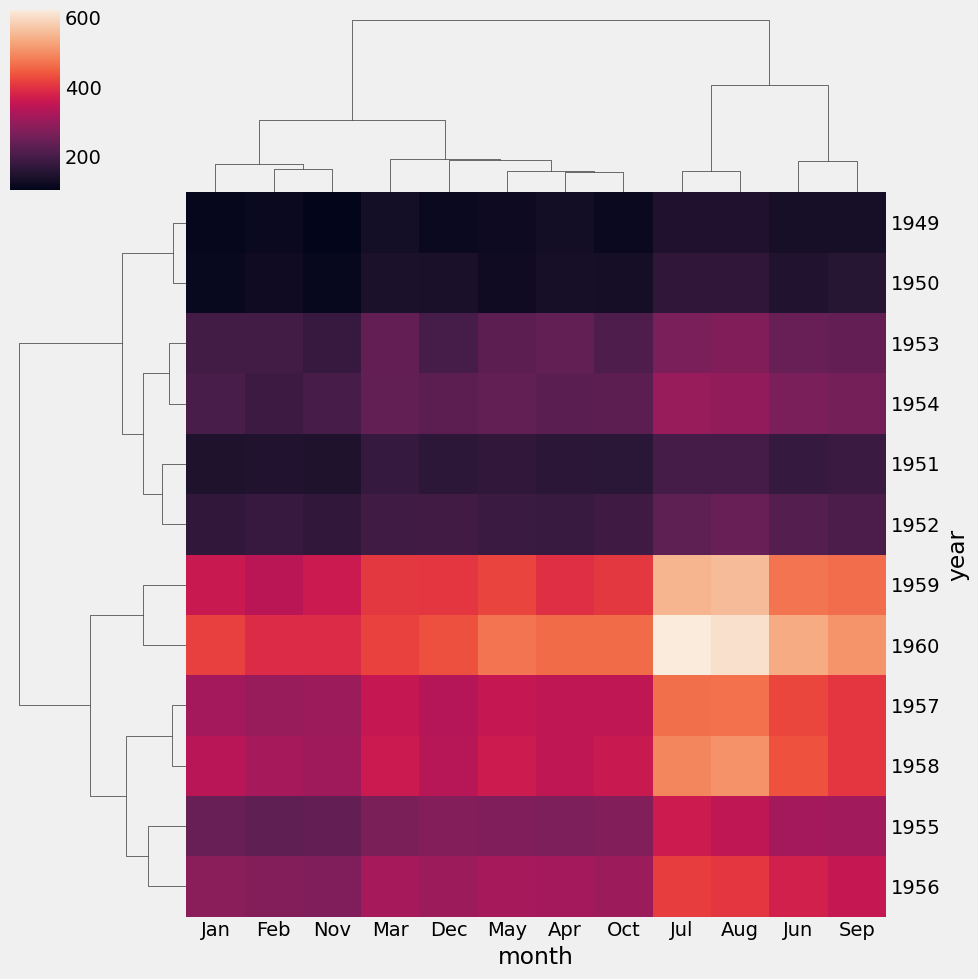

In [39]:
sns.clustermap(x)

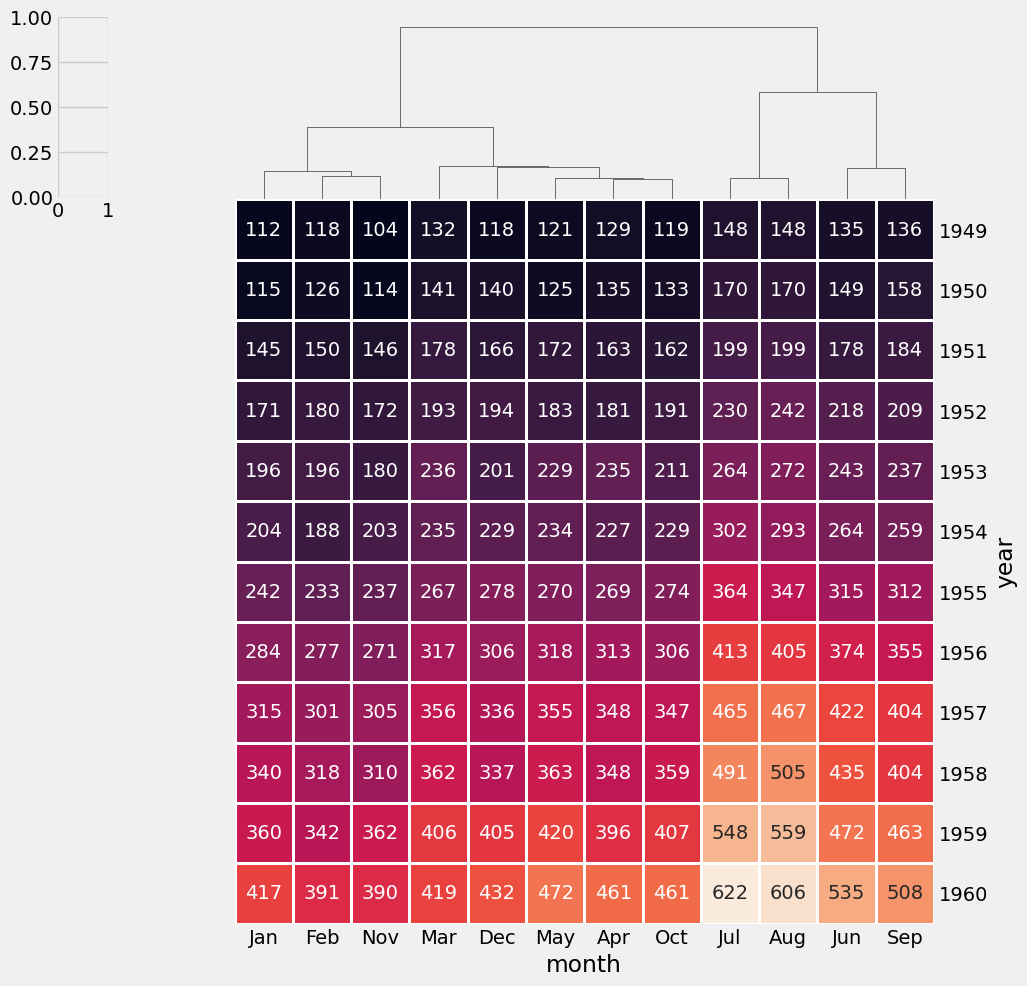

In [36]:
sns.clustermap(x,cbar = False, linewidths = 1, annot = True , fmt = "d",row_cluster = False)
# column wise clustering

In [42]:
# this clustering happens bcoz of a parameter called metric that have default value 
# as euclidian and can have many other values like correlation , cosin etc etc

# Multivariate Plots

### jointplot

A **`jointplot`** creates a **multi-panel figure** that shows:

- The **bivariate relationship** (joint distribution) between two variables  
- The **univariate distributions** (marginal distributions) of each variable along the top and right axes

---

#### When to Use

Use `jointplot` when you want to **visualize the relationship between two variables** while also seeing their individual distributions.

---

#### Kinds of Plots You Can Use

- `'scatter'` – default; shows raw data points
- `'kde'` – Kernel Density Estimate (smoothed contour plot)
- `'hex'` – Hexbin plot for dense data
- `'reg'` – Regression line with scatter points

In [45]:
tips = sns.load_dataset("tips")

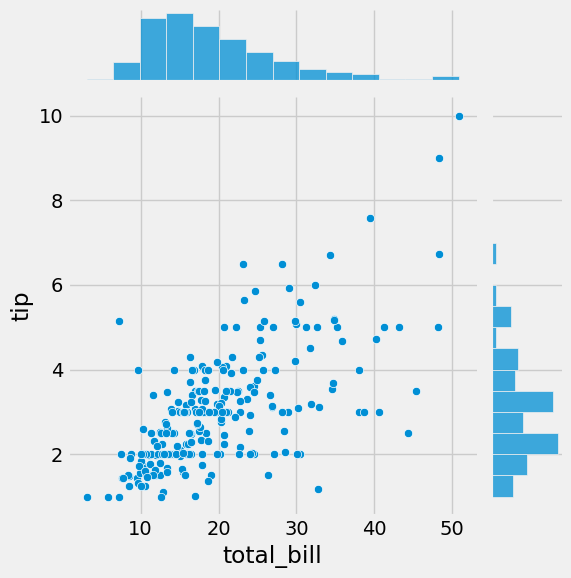

In [46]:
sns.jointplot(x = "total_bill" , y = "tip" , data = tips)

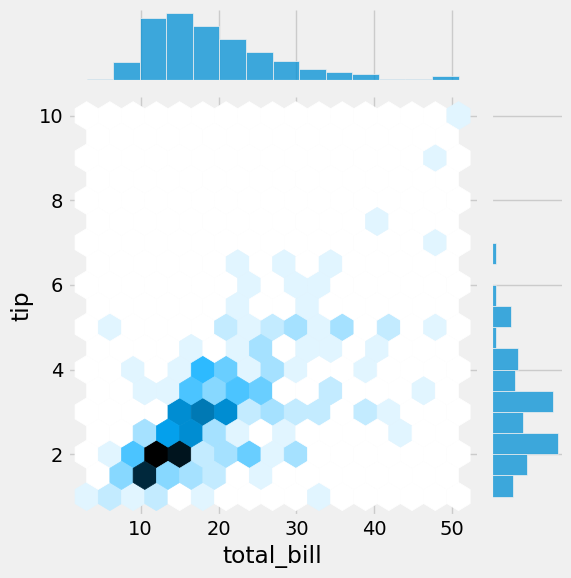

In [47]:
sns.jointplot(x = "total_bill", y = "tip" , kind = "hex" , data = tips)

hexbin is 2-D histograms the denser bin signify higher value and vice versa

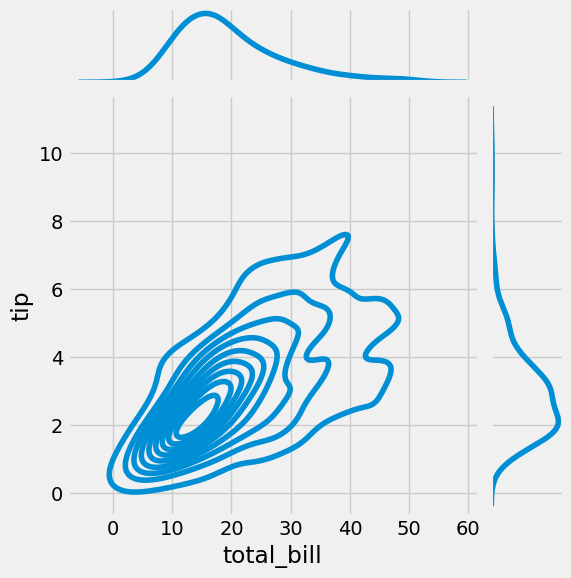

In [49]:
sns.jointplot(x = "total_bill", y = "tip" , kind = "kde" , data = tips)

In [37]:
# this thing is calleds contour and it is 2d PDF (probability distribution function)
# and assume it like amountain like the outer rings signify lesser or sparse 
# points and center one means higher density

### Regression Plots (regplot)

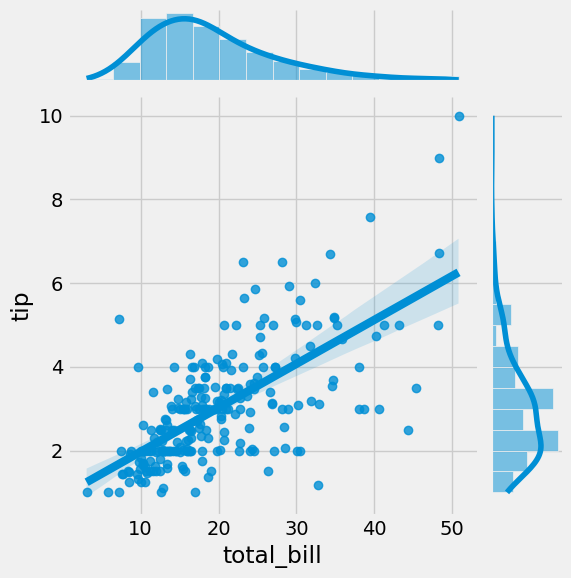

In [51]:
sns.jointplot(x = "total_bill", y = "tip" , kind = "reg" , data = tips)  

In [38]:
# It draws a best-fit line (regression line) that helps in predicting future 
# values based on the existing data.

### Pairplot
- A pairplot creates a grid of jointplots for every pair of numeric variables in your dataset.
- It plots pairwise relationships (scatter plots) between all combinations of variables.
- The diagonal shows histograms or KDEs for each variable.
- Great for exploratory data analysis.
- Use When:
    - You want to quickly explore relationships in multi-variable datasets.

In [54]:
iris = sns.load_dataset("iris")

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


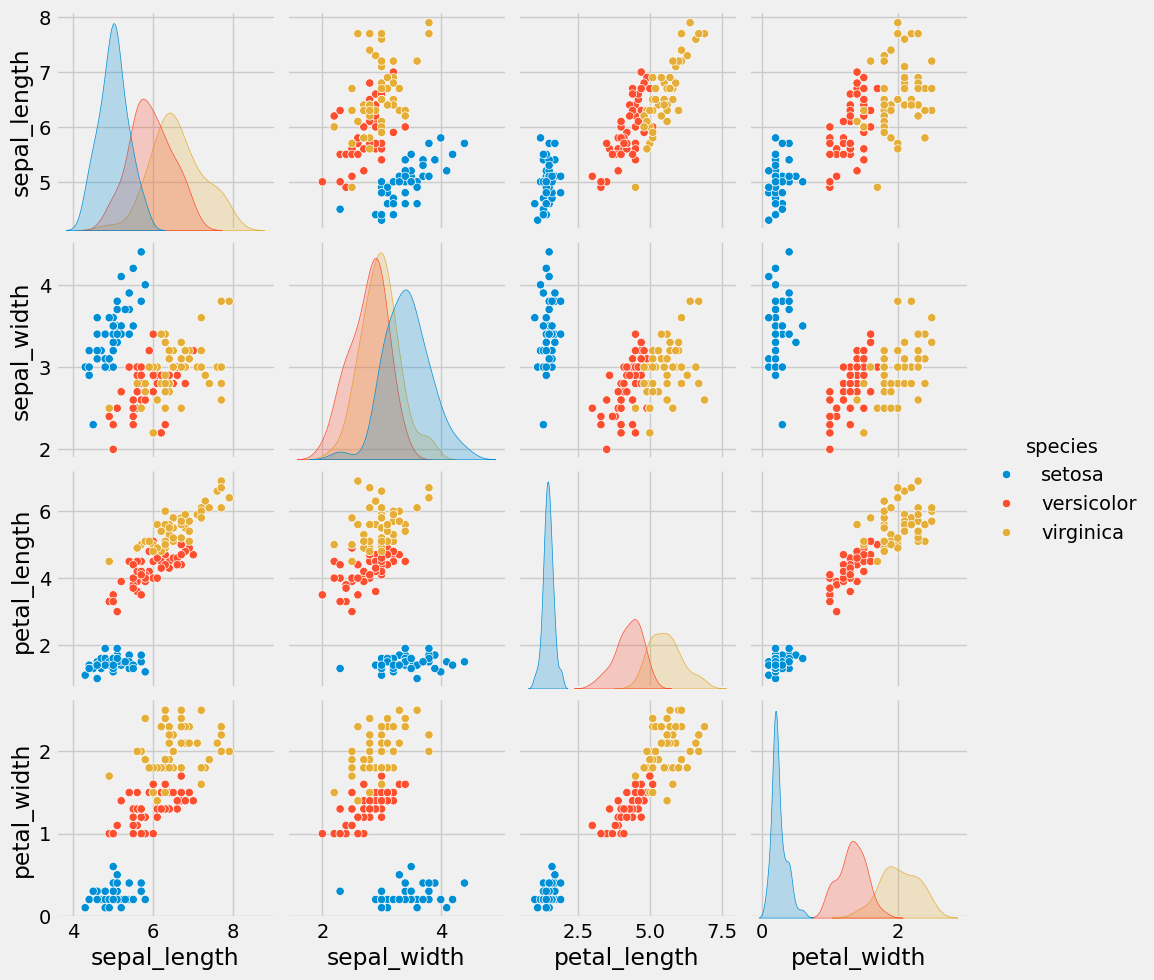

In [58]:
sns.pairplot(iris, hue = "species")

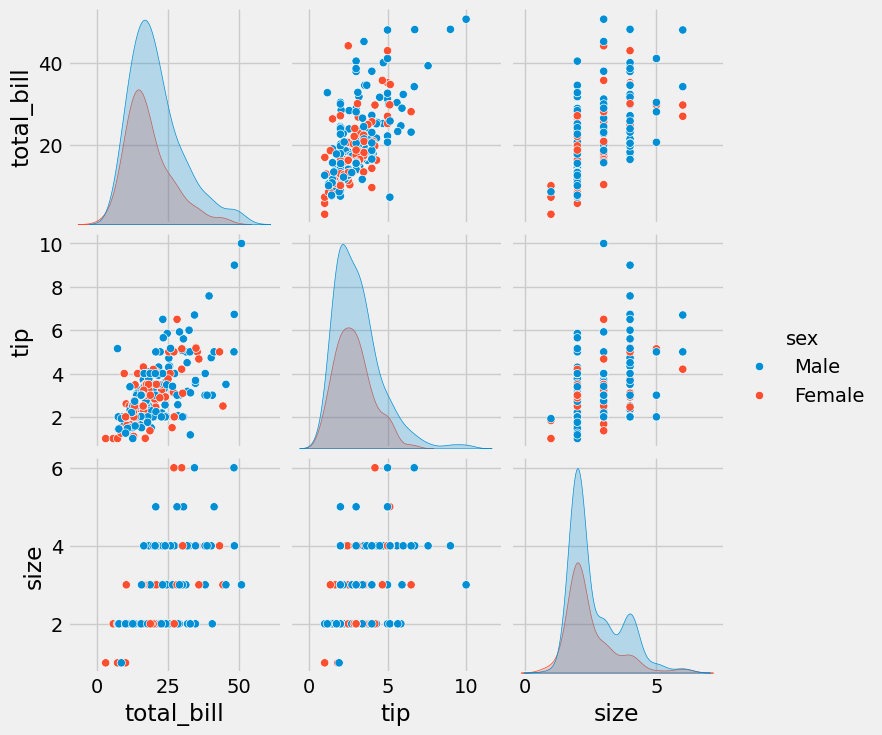

In [59]:
sns.pairplot(tips, hue = "sex")

# Distribution Plots

# Density Plot

- Used for univariate analysis of continuous/numeric data.
- Combines three visualizations in one plot:
  - Histogram: shows the frequency distribution.
  - Kernel Density Estimate (KDE): smooths the distribution into a continuous probability density function (PDF).
  - Rugplot: marks individual data points along the x-axis.

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
titanic['age'].fillna(titanic['age'].mean(), inplace = True) 
# handelling the missing values

C:\Users\Toshaksha\AppData\Local\Temp\ipykernel_29360\4148941832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace = True)


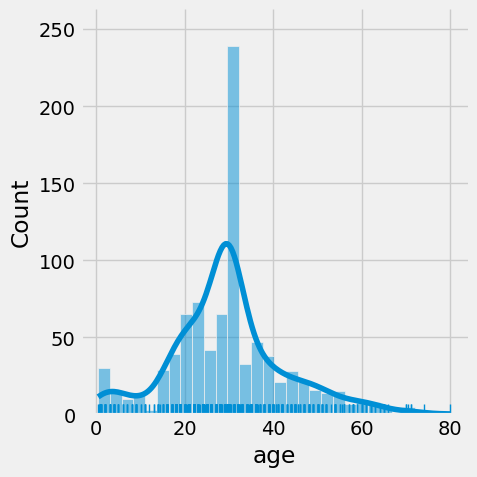

In [42]:
# Displot (histogram + KDE + rug by default)
sns.displot(titanic['age'], kde=True, rug=True)

<Axes: xlabel='age', ylabel='Count'>

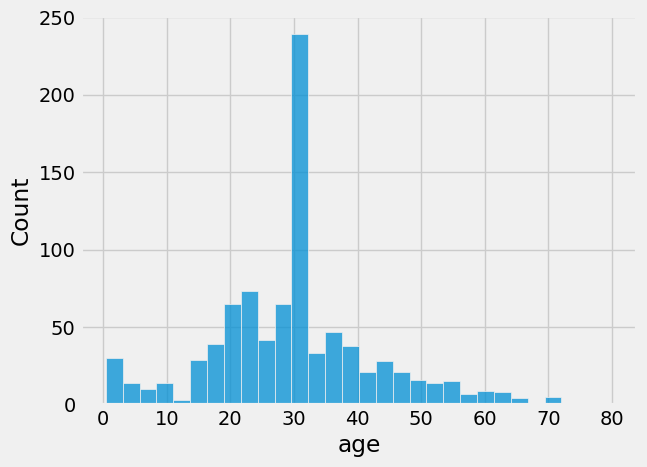

In [45]:
# Only Histogram
sns.histplot(titanic['age'], kde=False)

<Axes: xlabel='age', ylabel='Density'>

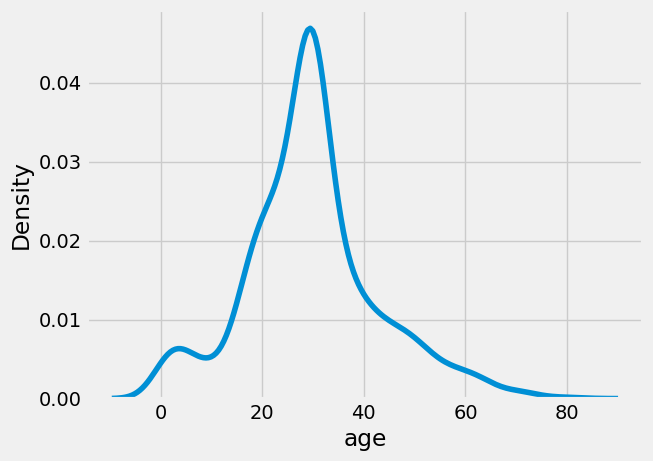

In [46]:
# Only KDE plot
sns.kdeplot(titanic['age'])

<Axes: xlabel='fare'>

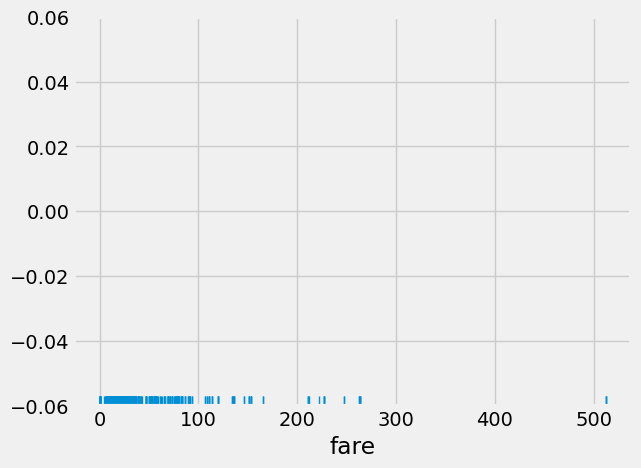

In [47]:
# Only Rug plot
sns.rugplot(titanic['fare'])

In [48]:
# Benefit of Rug Plot:
# Rug plots show individual data points along the axis, giving insight into data 
# density and distribution granularity that histograms might smooth over.

### How to use Displots


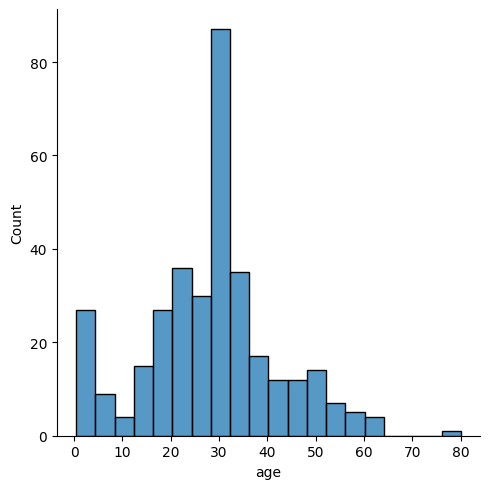

In [15]:
sns.displot(titanic[titanic['survived'] == 1]['age'])  # gives a binary series a boolean series
# fetched age value of all those who survived and passed it to the displot

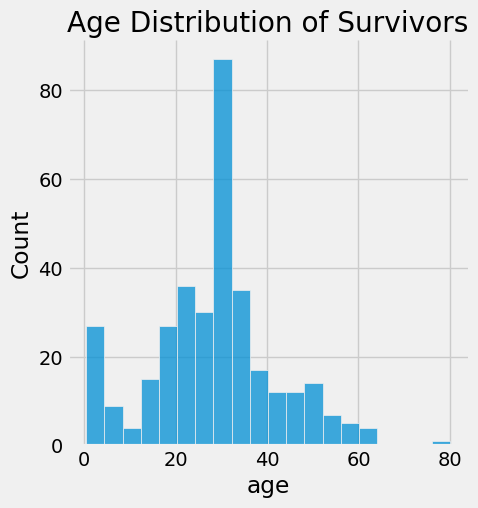

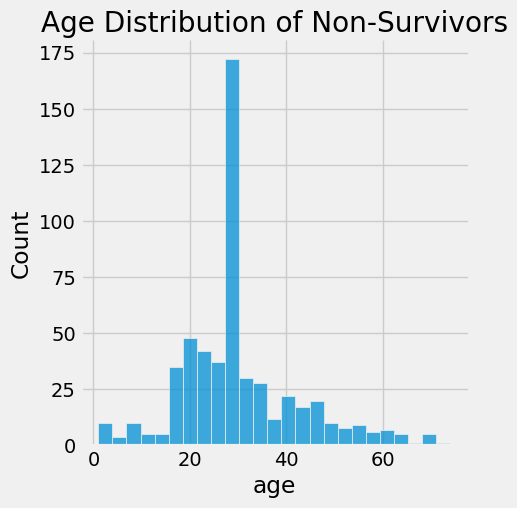

In [50]:
# Plotting age distribution of passengers who survived (survived == 1
sns.displot(titanic[titanic['survived'] == 1]['age'])
plt.title("Age Distribution of Survivors")
plt.show()

# Plotting age distribution of passengers who did not survive (survived == 0)
sns.displot(titanic[titanic['survived'] == 0]['age'])
plt.title("Age Distribution of Non-Survivors")
plt.show()
